#### Nama  : Muhamad Agus Faisal
#### NIM   : 21416255201178
#### Kelas : IF21B

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Import
df = pd.read_csv('/content/drive/MyDrive/py-for-ds/datasets/Airdata.csv')

In [25]:
# Looking up the data
df.sample(5)

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
541,1/23/2020 13:00,2.740529,68,4.379589,9.462311,54.90,79.33,103.18
6353,9/21/2020 17:00,24.180529,51,10.495713,185.906140,51.45,67.98,131.02
2578,4/17/2020 10:00,16.810530,54,3.617955,95.710590,9.53,10.00,57.33
1733,3/13/2020 5:00,6.100529,79,15.509274,291.801400,17.60,26.50,32.73
8364,12/14/2020 12:00,8.070529,71,15.256526,109.290040,37.20,34.23,91.38


In [26]:
# Getting the number of missing values per column
missing_values_count = df.isnull().sum()
# looking at first 10 columns missing values in dataset
missing_values_count[0:10]

,0
DateTime,0
Temperature,0
Humidity,0
Wind_Speed,0
Wind_Direction,0
NO2_Location_A,120
NO2_Location_B,580
NO2_Location_C,132


In [27]:
# How many total missing values do we have in Airdata
total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.1839708561020037

In [28]:
# Remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

# checking how much data did we lose?
print("Columns in original dataset:", df.shape[1])
print("Columns with missing values dropped:", columns_with_na_dropped.shape[1])

Columns in original dataset: 8
Columns with missing values dropped: 5


In [29]:
# get a small subset of the Airdata
subset_df = df.loc[:, 'Humidity':'Wind_Speed'].head()
subset_df

# Replace all NaN with 0
subset_df.fillna(0)

,Humidity,Wind_Speed
0,87,1.484318
1,89,2.741678
2,85,3.563818
3,84,2.811690
4,86,1.800000


In [30]:
import pandas as pd
import numpy as np

# for box-cox transformation
from scipy import stats

# for min max scaling
from mlxtend.preprocessing import minmax_scaling

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Import
df = pd.read_csv('/content/drive/MyDrive/py-for-ds/datasets/chicago_population.csv')

In [32]:
# set seed for reproducibility
np.random.seed(0)
df.head()

,name,population,income,latino,black,white,asian,other
0,Rogers Park,54991,39482,0.244,0.263,0.393,0.064,0.036
1,West Ridge,71942,47323,0.204,0.111,0.427,0.225,0.032
2,Uptown,56362,40324,0.142,0.200,0.516,0.114,0.028
3,Lincoln Square,39493,57749,0.191,0.038,0.631,0.111,0.029
4,North Center,31867,81524,0.136,0.023,0.773,0.045,0.022


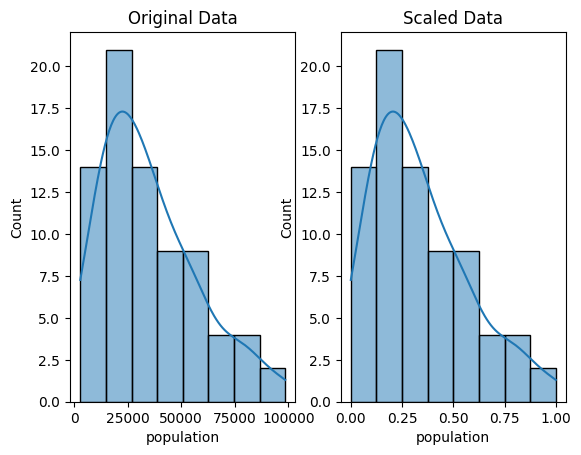

In [33]:
# select the usd goal real column
chicago_population = df.population

# scale the goals from 0 to 1
min_val = chicago_population.min()
max_val = chicago_population.max()
scaled_data = (chicago_population - min_val) / (max_val - min_val)

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.histplot(chicago_population, ax=ax[0], kde=True)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title("Scaled Data")
plt.show()

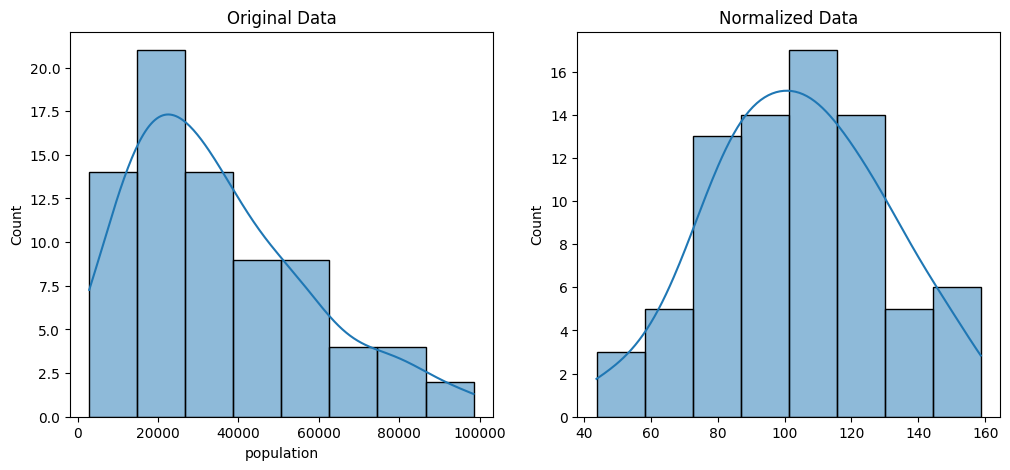

In [34]:
# get the index of all positive population
index_of_positive_population = df['population'] > 0

# get only positive population
positive_population = df['population'].loc[index_of_positive_population]

# normalize
normalized_population = stats.boxcox(positive_population)[0]

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(positive_population, ax=ax[0], kde=True)
ax[0].set_title("Original Data")
sns.histplot(normalized_population, ax=ax[1], kde=True)
ax[1].set_title("Normalized Data")
plt.show()

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
df = pd.read_csv('/content/drive/MyDrive/py-for-ds/datasets/Airdata.csv')

# set seed for reproducibility
np.random.seed(0)
df.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [37]:
# create a new column, date_parsed, with the parsed dates
df['date_parsed'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M')
# print the first few rows
df['date_parsed'].head()

,date_parsed
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00


In [38]:
# Read in the file with the encoding detected by chardet
df = pd.read_csv('/content/drive/MyDrive/py-for-ds/datasets/Airdata.csv', encoding="Windows-1252", low_memory=False)

# look at the first few lines
df.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


In [39]:
# read in our dat
df = pd.read_csv('/content/drive/MyDrive/py-for-ds/datasets/Airdata.csv', encoding="Windows-1252")
df.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


In [40]:
# import
df = pd.read_csv('/content/drive/MyDrive/py-for-ds/datasets/chicago_population.csv')

# get all the unique values in the 'name'
nama = df['name'].unique()

# sort them alphabetically and then take a closer look
nama.sort()
nama

array(['Albany Park', 'Archer Heights', 'Armour Square', 'Ashburn',
       'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Bridgeport', 'Brighton Park',
       'Burnside', 'Calumet Heights', 'Chatham', 'Chicago Lawn',
       'Clearing', 'Douglas', 'Dunning', 'East Garfield Park',
       'East Side', 'Edgewater', 'Edison Park', 'Englewood',
       'Forest Glen', 'Fuller Park', 'Gage Park', 'Garfield Ridge',
       'Grand Boulevard', 'Greater Grand Crossing', 'Hegewisch',
       'Hermosa', 'Humboldt Park', 'Hyde Park', 'Irving Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Logan Square', 'Loop', 'Lower West Side',
       'McKinley Park', 'Montclare', 'Morgan Park', 'Mount Greenwood',
       'Near North Side', 'Near South Side', 'Near West Side', 'New City',
       'North Center', 'North Lawndale', 'North Park', 'Norwood Park',
       "O'Hare", 'Oakland', 'Portage Park', 'Pullman', 'Riverdale',


In [41]:
# convert to lower case
df['name'] = df['name'].str.lower()
# remove trailing white spaces
df['name'] = df['name'].str.strip()